___

# Using Convolutional Neural Networks for Multi-digit Classification

___

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)</br>
3. [Preparing Training and Test Sets](#section3)</br>
4. [Creating and Training the Model](#section4)</br>
5. [Image Transformations](#section5)</br>
6. [Predictions](#section6)</br>
7. [Conclusion](#section7)</br>  

___

<a id='section1'></a>
### 1. Problem Statement

In this notebook we will be using CNN on the MNSIT dataset in order to detect numbers with 1 or more digits from handwritten numbers. The model will be able to finally return the number that was shown to it. To do this, we will be using OpenCV in order to detect and highlight the digits that are identified. To do this we will use various different libraries such as keras, matplotlib and OpenCV. Lastly, we will save the model and create a simple app using Flask.

___

<a id='section2'></a>
### 2. Data Loading and Description

- The MNIST database contains a set of handwritten digits written by 500 different writers. It is a subset of a larger set available from NIST. 
- It has a training set of __60,000__ examples, and a test set of __10,000__ examples. The digits have been size-normalized and centered in a fixed-size image.

#### Importing packages                                          

In [115]:
import cv2
import numpy as np
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping

#### Importing the Dataset

In [ ]:
from keras.datasets import mnist

___

<a id='section3'></a>
### 3. Preparing Training and Test Sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Here we separate our data into training and test sets. We can do this simply by setting the training and test tuple as shown above.

In [151]:
## Check shapes of training and testing sets
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000, 10)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000, 10)


- As mentioned in the beginning, our training set has __60000__ images and our test set has __10000__ examples. The shape of each of the images is __28x28__ as we can see above as well. This means that when predicting from an image, we will need it to be in the same format.

In [5]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

- The images we will be using in our training will be greyscale images. This is represented by the 1 at the end of the shape.

Our next step will be to One hot encode the test and train output variables. We do this to have our output in a form that can be understood by our CNN. Our final layer will have 10 nodes. One for each number from 0-9. This will form a single dimension array of size 10. We will use the softmax function to obtain the probabilities of each number and the one with the highest probability will be set to one while all the other values in the array will be set to 0.

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

This is easily done by using the __to_categorical()__ function on y_train and y_test. Now both of them will be represented as a 1D vector with 10 elements each.

___

<a id='section4'></a>
### 4. Creating and Training the Model

In [127]:
## Create an instance of the model
model = Sequential()

## Define the layers
layer_1 = Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = Conv2D(64, kernel_size=3, activation='relu')
layer_3 = Flatten()
layer_4 = Dense(10, activation='softmax')

## Add the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)

- We will be using a simple Sequential model with 4 layers. We will have 2 Conv2D layers, followed by a flattening layer and lastly a fully-connected dense layer which will act as our output layer.
- Since our output is a multi-class classification problem, we will be using the softmax function as our activation function in the last layer. Our Conv2D layers will have the Rectified Linear Unit or ReLU function.

In [128]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Next we compile our model using the categorical crossentropy loss function and the popular adam optimizer. We will be using accuracy as our metric of performance.

In [129]:
early_stop = EarlyStopping(monitor='val_loss',mode='min', verbose=1,patience=1)

We will also implement an early stopping mechanism so that we do not overfit to our data. __val_loss__ will be used as our monitored metric and we will try and minimize this value.

In [130]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=6,callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 66s 1ms/step - loss: 0.3751 - accuracy: 0.9524 - val_loss: 0.1042 - val_accuracy: 0.9674
Epoch 2/6
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0641 - accuracy: 0.9811 - val_loss: 0.0911 - val_accuracy: 0.9722
Epoch 3/6
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0428 - accuracy: 0.9864 - val_loss: 0.0969 - val_accuracy: 0.9749
Epoch 00003: early stopping


As we can see, when we train our model, it triggers early stopping at __3 epochs__. At this point our model acheives an accuracy of about __98.6%__ and a validation accuracy of __97.5%__.

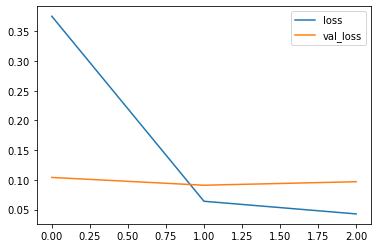

In [131]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

Now lets examine our loss and val_loss in order to see if our Early Stopping mechanism has worked. As we can see, the early stopping was able to stop training before the __val_loss__ increased.

___

<a id='section5'></a>
### 5. Image Transformations

Now that we've trained our model, the next step is to ready the image we are going to predict on. This includes augmentation such as resizing the images, thresholding and applying morphological transformations.

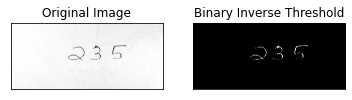

In [132]:
img = cv2.imread('predict.jpg',0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)

titles = ['Original Image', 'Binary Inverse Threshold']
images = [img, th1]
for i in range(2):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

The above cell shows the effect of using binary inversion thresholding on an image.

- Next we will define the kernals with which we will be performing morphological transformations such as erosion and dilation.
- Following this, we will load in our image, we will then apply thresholding on it and then apply both erosion and dilation. This can also be seen as opening. We define them separately so as to be able to control the amount of erosion and dilation in the operation.
- In our case, we need to dilate slightly more than erode to be able to work with our image.
- After this, we will use OpenCV in order to find contours in our image so that we can then use these to create a bounding rectangle and draw them out.
- Though we did perform erosion and dilation, we will also add a condition so that small isolated, unwanted features will not be recognized.
- We then add all the pixels within these rectangles to a list which will contain all the digits in the number. Then we resize and add padding to it as the images of the MNIST dataset are also padded and that was the format of the images that our model is trained on.

In [137]:
kernel = np.ones((10,10),np.uint8)
kernel1 = np.ones((1,1),np.uint8)

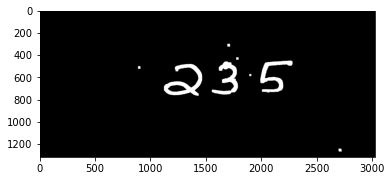




----------------Contoured Image--------------------
number of digits in the number :  3


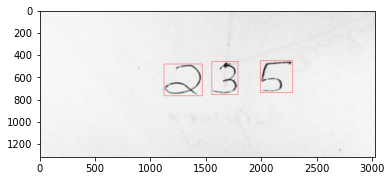

In [139]:
image = cv2.imread('./predict.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 170, 255, cv2.THRESH_BINARY_INV)

thresh = cv2.erode(thresh,kernel1,iterations=1)
thresh = cv2.dilate(thresh,kernel,iterations=2)
plt.imshow(thresh,cmap='gray')
plt.show()
_, contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
i = 0
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    if ( w <= thresh.shape[0]*(0.05)) and h <= (thresh.shape[1]*(0.05)): # Even after we have eroded and dilated the images, we will still take
                                                                         #precaution not to have small unwanted pixels or features being detected
        
        continue;
    else:
        
        # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
        cv2.rectangle(image, (x,y), (x+w, y+h), color=(255, 0, 0), thickness=2)

        # Cropping out the digit from the image corresponding to the current contours in the for loop
        digit = thresh[y:y+h, x:x+w]


        # Resizing that digit to (18, 18)
        i +=1
        resized_digit = cv2.resize(digit, (18,18))
       
        # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)

        # Adding the preprocessed digit to the list of preprocessed digits
        preprocessed_digits.append(padded_digit)
print("\n\n\n----------------Contoured Image--------------------")
print('number of digits in the number : ',i)
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)

Our final contoured image is our original image with rectangles bounding each digit. At this point we also print the number of digits the number has.

___

<a id='section6'></a>
### 6. Predictions

Finally we ar ready to view our prediction and see what the handwritten number is. To do this, we iterate through our list of preprocessed digits and pass them to the __model.predict()__ function after reshaping it. We reshape it so that we specify the batch as well as the number of channels which in our case is 1 (greyscale)

=========PREDICTION============ 




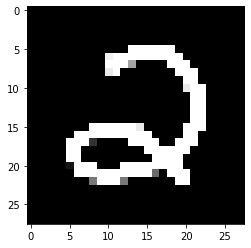



 Prediction of digit number 1 : 2


---------------------------------------




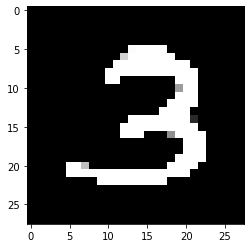



 Prediction of digit number 2 : 3


---------------------------------------




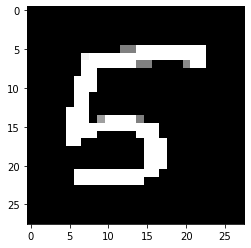



 Prediction of digit number 3 : 5


---------------------------------------


========= FINAL PREDICTED NUMBER ============ 

The final predicted number is : 235




In [86]:
print ("=========PREDICTION============ \n\n")
final_num = 'The final predicted number is : '
index = 0
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))   # the first 1 signifies the batch size, the last 1 signifies greyscale image
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\n Prediction of digit number {} : {}".format(index+1,np.argmax(prediction)))
    index +=1
    final_num += str(np.argmax(prediction))
    print ("\n\n---------------------------------------\n\n")
print ("========= FINAL PREDICTED NUMBER ============ \n")
print(final_num)
print ("============================================= \n\n")

___

<a id='section7'></a>
### 7. Conclusion

- We imported all the libraries we required in order to build and train our model. We also imported the MNIST dataset in order to train our model.
- After this we created our train and test sets from the dataset. Our target variable (y_train and y_test) had to be one-hot encoded in order to fit the architecture of our CNNs final layer. We required each digit to be a node in the last layer so that using the softmax function would allow us to retrieve the probabilities of each of the digits for an input.
- Next we began training the model with an arbitrary CNN structure of 2 Conv2D layers, one flattening and one Dense layer. We observed that our model had a very good accuracy of about __98%__.
- We set an arbitrary value of epochs as we had implemented an EarlyStopping mechanism in order to prevent overfitting and hopefully reduce our training time.
- Once our model was trained, we were ready to perform image augmentation on the image with which we needed to make a prediction. This included performing resizing and morphological transformations on the image in order to reduce noise and enhance certain features that would make it easier for our model to understand.
- After we did this, we were ready to use OpenCV to find contours and bounding rectangles in this picture (one for each digit) and hightlight them.
- Lastly, we were able to then iterate through this list of recognized digits and finally display the number that was written in our image.

___